In [1]:
import numpy as np
import matplotlib.pyplot as plt


from rtmag.process.paper.analytical_field import get_analytic_b_field

from rtmag.process.paper.load import MyModel
device = "cpu"
import rtmag.process.paper.metric as m
from rtmag.process.paper.potential_field import get_potential_field
from rtmag.process.paper.opt import relax
from rtmag.process.paper.opth import draw

In [2]:
l = 0.3
psi = 0.25*np.pi
B = get_analytic_b_field(m=1, l=l, psi=psi)

In [3]:
np.save('analytic_b_field.npy', B)

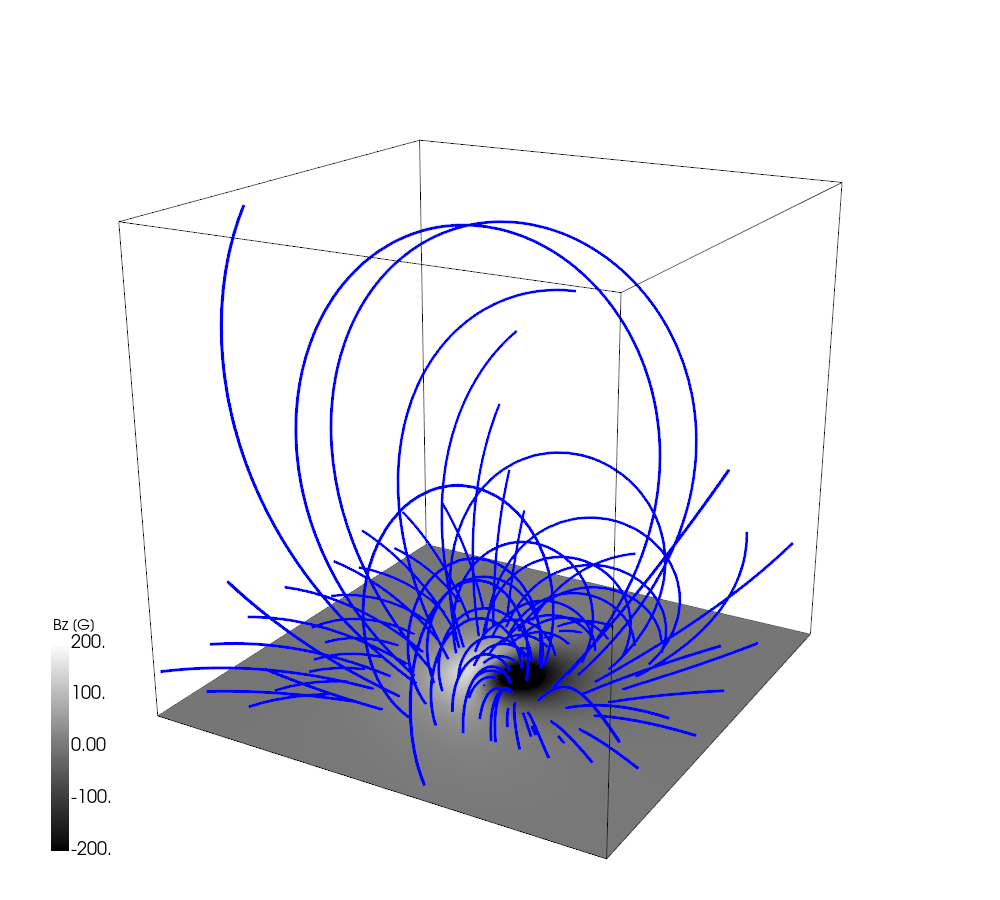

In [4]:
draw(B)

# Potential

In [5]:
B = np.load('analytic_b_field.npy')
B.shape

(64, 64, 64, 3)

In [6]:
bottom = B[:, :, 0, :]
print(bottom.shape)

nx, ny, nz, _ = B.shape
print(nx, ny, nz)

(64, 64, 3)
64 64 64


In [7]:
bp = get_potential_field(bottom[..., 2], nz, l=0.5)

Potential Field: 100%|██████████| 128/128 [00:03<00:00, 32.17it/s]


In [8]:
np.save("lowlou_pot.npy", bp)

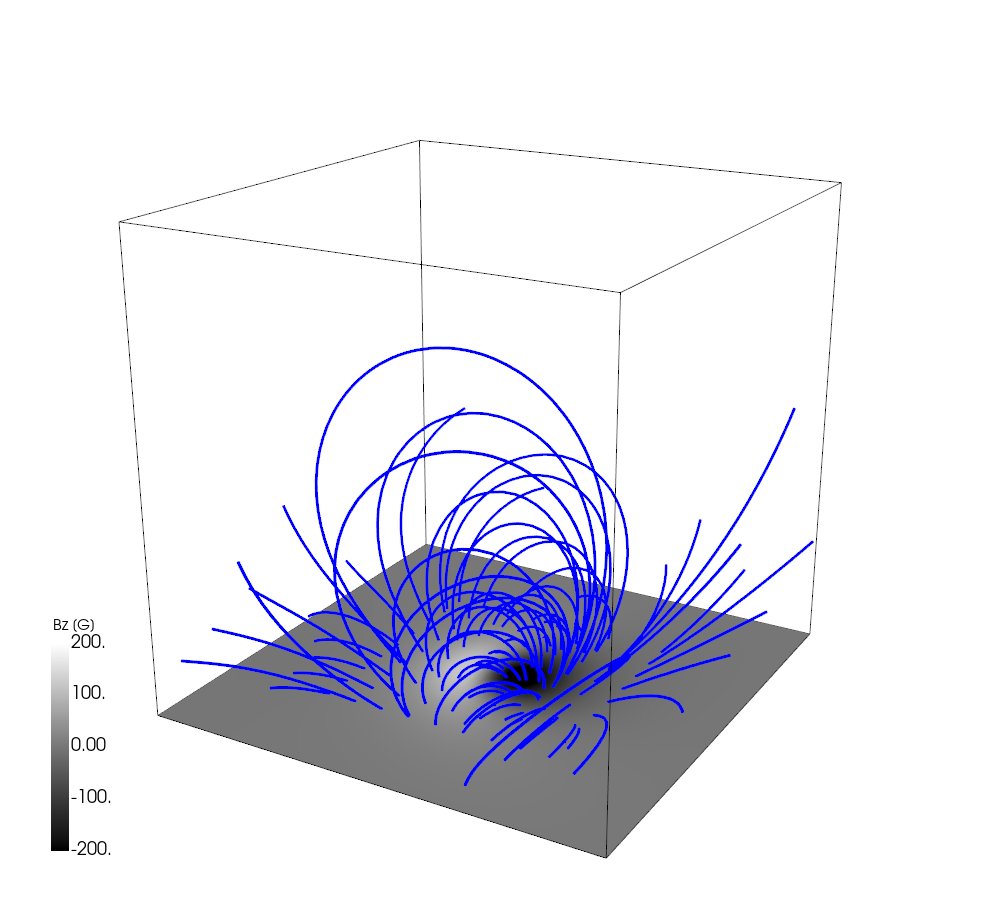

In [9]:
draw(bp)

In [10]:
res = m.evaluate(bp, B)
print()
print(f"sigmaJ_b: {res['sigmaJ_b']:.4f}")
print(f"div_b   : {res['div_b']:.4f}")
print(f"sigmaJ_B: {res['sigmaJ_B']:.4f}")
print(f"div_B   : {res['div_B']:.4f}")

C_vec     : 0.85
C_cs      : 0.81
E_n'      : 0.42
E_m'      : 0.33
eps       : 0.62
sigmaJ_b  : 0.82
div_b     : 0.00
sigmaJ_B  : 0.02
div_B     : 0.00
sig100_b  : 81.65
div100_b  : 0.11
sig100_B  : 1.71
div100_B  : 0.02

sigmaJ_b: 0.8165
div_b   : 0.0011
sigmaJ_B: 0.0171
div_B   : 0.0002


# Optimization

In [11]:
B = np.load('analytic_b_field.npy')
bottom = B[:, :, 0, :]
print(bottom.shape)

(64, 64, 3)


In [12]:
bp = np.load("lowlou_pot.npy")
bp.shape

(64, 64, 64, 3)

In [13]:
bp[:, :, 0, :] = bottom

In [14]:
br = relax(bp, 'lowlou_opt')

nx, ny, nz =  64 64 64
Lx, Ly, Lz =  1.0 1.0 1.0
dx, dy, dz =  0.015873015873015872 0.015873015873015872 0.015873015873015872
Bave =  27.104312896728516
maxit =  10000
mue =  2.5195263290501386e-05
it =  0 L =  tensor(69.3502, device='cuda:0') F =  tensor(74.1130, device='cuda:0') Li =  tensor(0.1786, device='cuda:0') Fi =  tensor(1.7168, device='cuda:0')
grad L/L tensor(1., device='cuda:0')
it =  10 L =  tensor(17.1005, device='cuda:0') F =  tensor(24.6961, device='cuda:0') Li =  tensor(5.7479, device='cuda:0') Fi =  tensor(18.6640, device='cuda:0')
grad L/L tensor(3.0554, device='cuda:0')
it =  20 L =  tensor(9.3081, device='cuda:0') F =  tensor(13.1182, device='cuda:0') Li =  tensor(6.9628, device='cuda:0') Fi =  tensor(21.3233, device='cuda:0')
grad L/L tensor(0.8372, device='cuda:0')
it =  30 L =  tensor(6.4595, device='cuda:0') F =  tensor(9.8185, device='cuda:0') Li =  tensor(5.6869, device='cuda:0') Fi =  tensor(19.6391, device='cuda:0')
grad L/L tensor(0.4410, device='cuda:0')

In [15]:
np.save("lowlou_opt.npy", br)

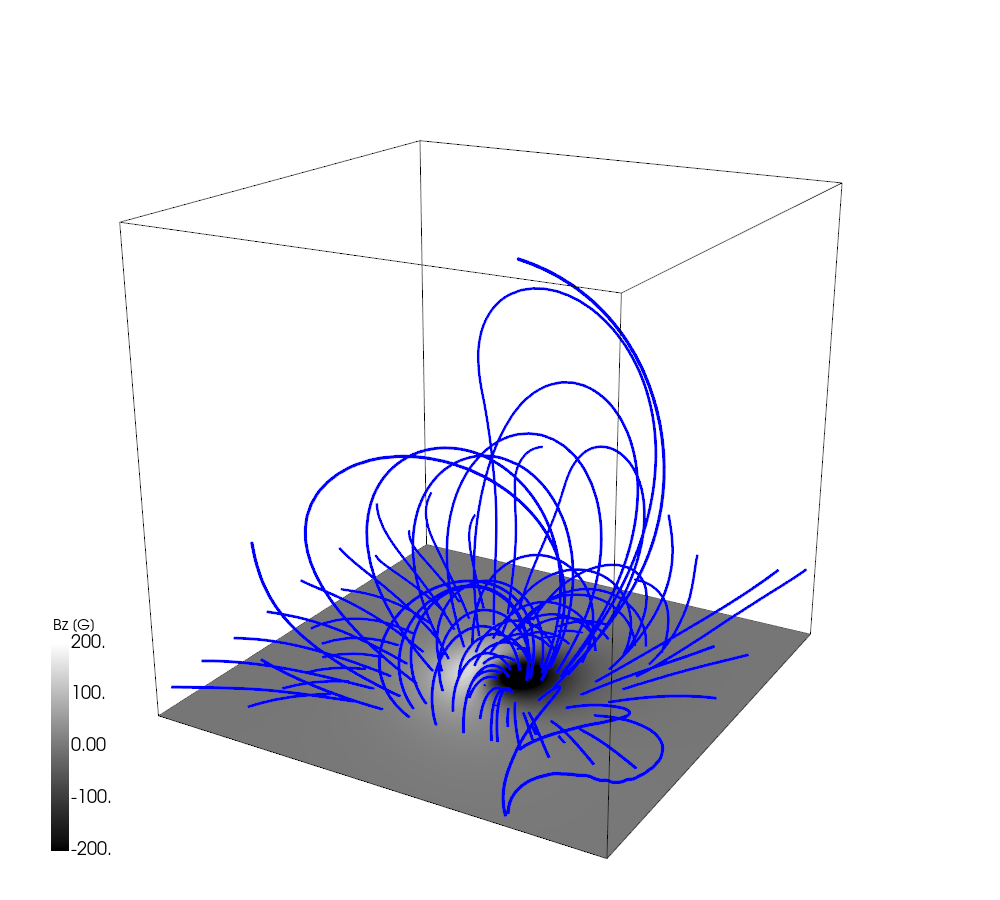

In [16]:
draw(br)

In [17]:
res = m.evaluate(br, B)
print()
print(f"sigmaJ_b: {res['sigmaJ_b']:.4f}")
print(f"div_b   : {res['div_b']:.4f}")
print(f"sigmaJ_B: {res['sigmaJ_B']:.4f}")
print(f"div_B   : {res['div_B']:.4f}")

C_vec     : 0.99
C_cs      : 0.85
E_n'      : 0.75
E_m'      : 0.45
eps       : 0.98
sigmaJ_b  : 0.12
div_b     : 0.02
sigmaJ_B  : 0.02
div_B     : 0.00
sig100_b  : 12.25
div100_b  : 1.77
sig100_B  : 1.71
div100_B  : 0.02

sigmaJ_b: 0.1225
div_b   : 0.0177
sigmaJ_B: 0.0171
div_B   : 0.0002


# AI

In [18]:
meta_path = "D:/models/lowlou/best_model.pt"

mm = MyModel(meta_path, device=device)

Model loaded from epoch 98


In [19]:
B = np.load('analytic_b_field.npy')
B.shape

(64, 64, 64, 3)

In [20]:
b_bottom = B[:, :, 0, :]
b_bottom = b_bottom.transpose((1, 0, 2))[None, None, ...]
print(b_bottom.shape)

(1, 1, 64, 64, 3)


In [21]:
b = mm.get_pred_from_numpy(b_bottom)

b_norm = 200 G
0.1286323070526123 seconds


In [22]:
np.save("lowlou_pino.npy", b)

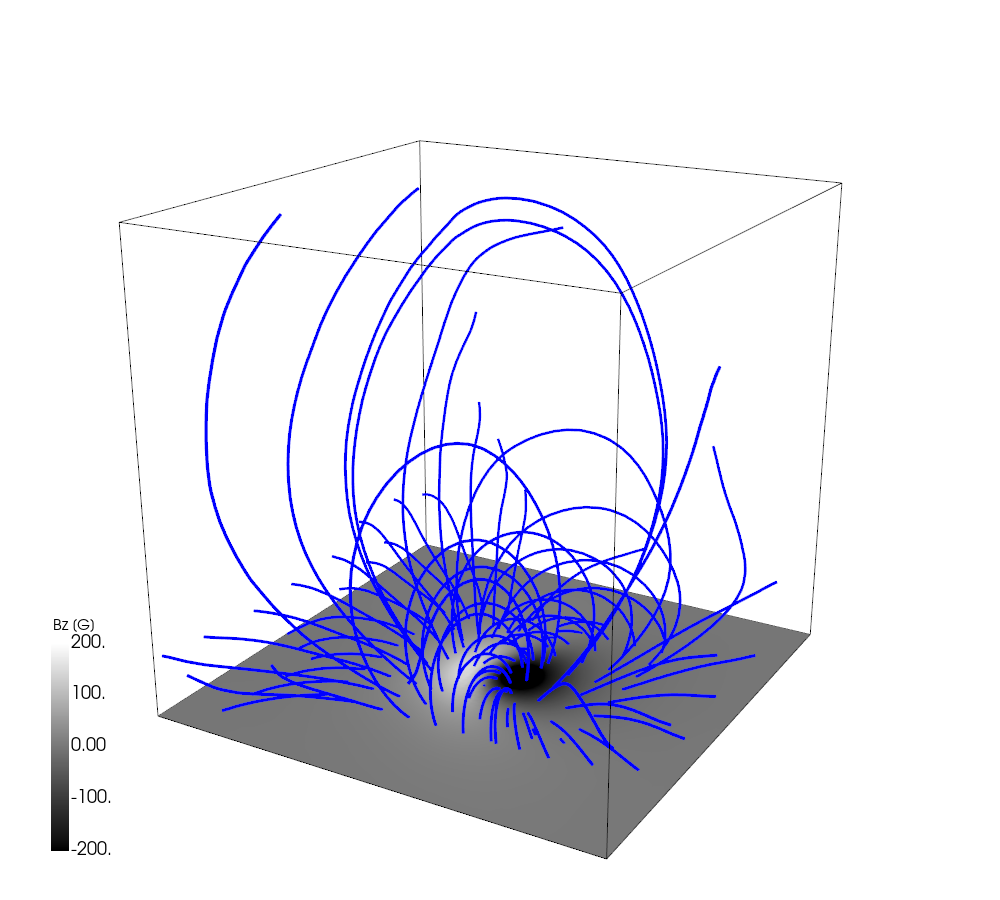

In [23]:
draw(b)

In [24]:
res = m.evaluate(b, B)
print()
print(f"sigmaJ_b: {res['sigmaJ_b']:.4f}")
print(f"div_b   : {res['div_b']:.4f}")
print(f"sigmaJ_B: {res['sigmaJ_B']:.4f}")
print(f"div_B   : {res['div_B']:.4f}")

C_vec     : 1.00
C_cs      : 0.98
E_n'      : 0.91
E_m'      : 0.81
eps       : 1.01
sigmaJ_b  : 0.24
div_b     : 0.03
sigmaJ_B  : 0.02
div_B     : 0.00
sig100_b  : 24.13
div100_b  : 3.47
sig100_B  : 1.71
div100_B  : 0.02

sigmaJ_b: 0.2413
div_b   : 0.0347
sigmaJ_B: 0.0171
div_B   : 0.0002


# AI + Optimization

In [25]:
B = np.load('analytic_b_field.npy')
b = np.load("lowlou_pino.npy")

In [26]:
bottom = B[:, :, 0, :]
print(bottom.shape)

(64, 64, 3)


In [27]:
b[:, :, 0, :] = bottom

In [28]:
br_pino = relax(b, 'lowlou_pino_opt')

nx, ny, nz =  64 64 64
Lx, Ly, Lz =  1.0 1.0 1.0
dx, dy, dz =  0.015873015873015872 0.015873015873015872 0.015873015873015872
Bave =  27.104312896728516
maxit =  10000
mue =  2.5195263290501386e-05
it =  0 L =  tensor(0.3268, device='cuda:0') F =  tensor(15.3266, device='cuda:0') Li =  tensor(0.4284, device='cuda:0') Fi =  tensor(16.3310, device='cuda:0')
grad L/L tensor(1., device='cuda:0')
it =  10 L =  tensor(0.2102, device='cuda:0') F =  tensor(8.0508, device='cuda:0') Li =  tensor(0.2509, device='cuda:0') Fi =  tensor(10.8250, device='cuda:0')
grad L/L tensor(0.5548, device='cuda:0')
it =  20 L =  tensor(0.1740, device='cuda:0') F =  tensor(5.8823, device='cuda:0') Li =  tensor(0.1927, device='cuda:0') Fi =  tensor(8.3220, device='cuda:0')
grad L/L tensor(0.2083, device='cuda:0')
it =  30 L =  tensor(0.1498, device='cuda:0') F =  tensor(4.8357, device='cuda:0') Li =  tensor(0.1633, device='cuda:0') Fi =  tensor(6.9079, device='cuda:0')
grad L/L tensor(0.1616, device='cuda:0')
it =

In [29]:
np.save("lowlou_pino_opt.npy", br_pino)

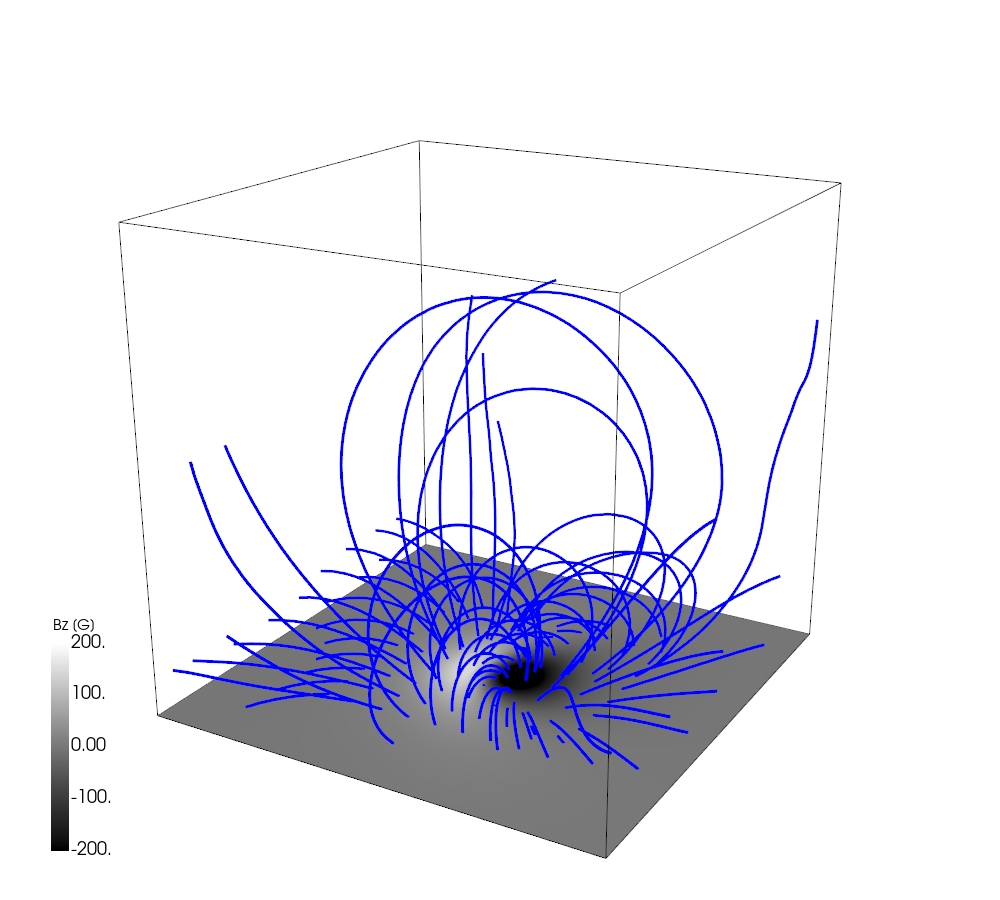

In [30]:
draw(br_pino)

In [31]:
res = m.evaluate(br_pino, B)
print()
print(f"sigmaJ_b: {res['sigmaJ_b']:.4f}")
print(f"div_b   : {res['div_b']:.4f}")
print(f"sigmaJ_B: {res['sigmaJ_B']:.4f}")
print(f"div_B   : {res['div_B']:.4f}")

C_vec     : 1.00
C_cs      : 0.96
E_n'      : 0.87
E_m'      : 0.71
eps       : 1.00
sigmaJ_b  : 0.08
div_b     : 0.01
sigmaJ_B  : 0.02
div_B     : 0.00
sig100_b  : 8.42
div100_b  : 1.43
sig100_B  : 1.71
div100_B  : 0.02

sigmaJ_b: 0.0842
div_b   : 0.0143
sigmaJ_B: 0.0171
div_B   : 0.0002
